In [1]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.knn import KNN 
from pyod.models.ocsvm import OCSVM
from pyod.models.copod import COPOD

pyod is a library used for outlier detection(anomaly detection).

The following are the outlier detection techniques supported by pyod.
* Proximity-Based
* Linear
* Probabilistic
* Outlier Ensembles
* Neural Networks

In [2]:
#Building the dataset
X = np.arange(0,100)
Y = np.sin(50 * X) # This builds a sinusodial wave.

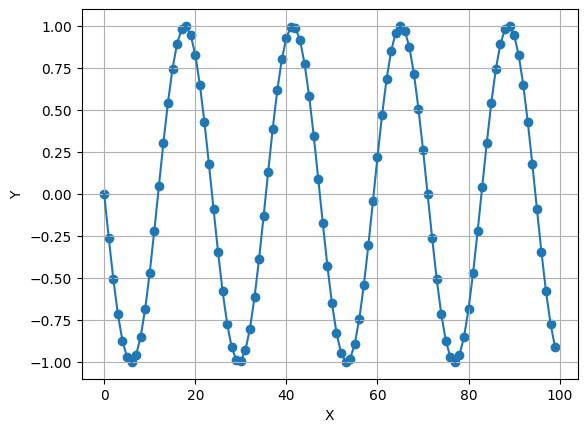

In [3]:
plt.plot(X,Y)
plt.scatter(X,Y)
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [4]:
Y[5] = 1.25
Y[60] = -2
Y[85] = 1.4
n_outliers = 3

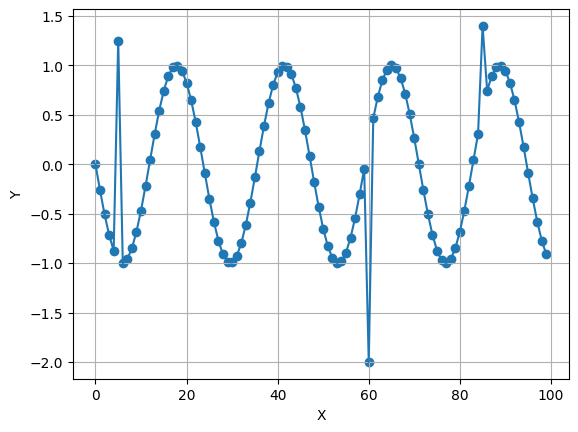

In [5]:
plt.plot(X,Y)
plt.scatter(X,Y)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Proximity-Based Models

* cluster analysis
* density based analysis
* nearest neighborhood

The pyod library implements the following algorithms:

* **LOF(Local Outlier Factor)** - An unsupervised anomaly detection method which computes the local density deviation of a given data point with its respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbours.


* **COF(Connectivity-Based Outlier Factor)** - Improved version of LOF. The algorithm assigns degree of outlier to each data point. This degree of outlier is called the COF of the data point. High COF value of a data point represent a higher probability of being an outlier.


* **CBLOF(Cluster-Based Local Outlier Factor)** - It is a measure for identifying the physical significance of an outlier is designed.


* **LOCI(Local Correlation Integral)** - It is a density based approach for outlier analysis. It computes a counting neighborhood to the nn nearest observations, where the radius is equal to the outermost deviation. Within the counting neighborhood each observation has a sampling neighboorhood of which size is determined by the alpha input parameter. LOCI returns an outlier based on the standard deviation of the sampling neighboorhood, called the multi-granularity deviation factor. The LOCI function is useful for outlier detection in **clustering** and other **multidimensional domains**.


* **HBOS(Histogram-based outlier score)** - It is a statistical anomaly detetction algorithm which calculates an outlier score by creating a univariate histogram for each single feature of the dataset. It assumes that the features are independent. This method is efficient in identifying outliers in both low-dimensional and high-dimensional data in an efficient way.


* **kNN(k Nearest Neighbord)** -KNN is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. In this for an observation, its distance to its kth nearest neighbor could be viewed as the outlying score. The KNN detectors that are supported largest (use the distance to the kth neighbor as the outlier score) .


* **AvgKNN(AverageKNN)** - use the average of all the k neighbors as the outlier score.


* **MedKNN(MedianKNN)** - use the median of the distance k neighbors as the outlier score.


* **SOD(Subspace Outlier Detection)** - Subspace outliers are identified by finding localized regions of the data in low-dimensional space that have abnormally low density. A genetic algorithm is employed to discover such local subspace regions.


* **ROD(Rotation-based Outlier Detection)** - It is parameter free, requires no statisticaldistribution assumptions and is intuitive in 3D space. Used with multivariate data.

In [6]:
Y = Y.reshape(-1,1) #Reshaping the data into format which can be given as an input to the KNN.
clf = KNN()
clf.fit(Y)

outliers = clf.predict(Y)
outliers #1 if the number is an outlier else 0 if the number is not an outlier

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
#Calculating the positions of the outliers using where()
np.where(outliers==1)

(array([ 5, 60, 85], dtype=int64),)

In [15]:
Y_outliers = Y[np.where(outliers==1)]
X_outliers = X[np.where(outliers==1)]
Y_inliers = Y[np.where(outliers==0)]
X_inliers = X[np.where(outliers==0)]

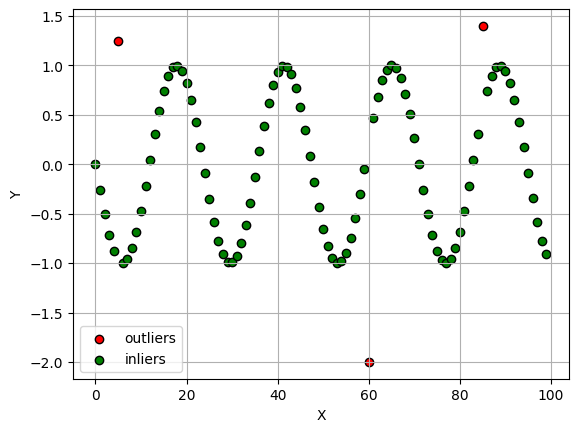

In [16]:
plt.scatter(X_outliers, Y_outliers, edgecolor='black',color='red', label='outliers')
plt.scatter(X_inliers, Y_inliers, edgecolor='black',color='green', label='inliers')
plt.legend()
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [11]:
anomaly_score = clf.decision_function(Y)

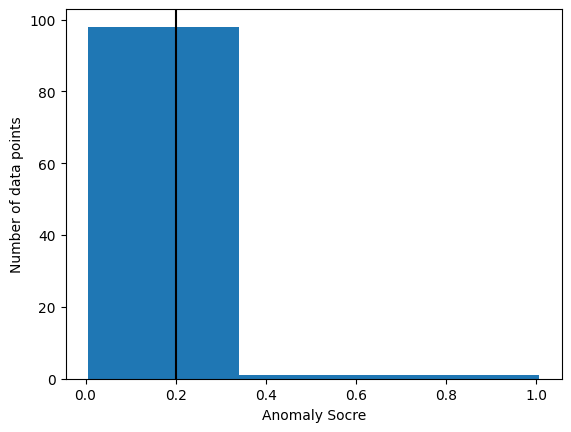

In [21]:
min_outlier_anomaly_score = np.floor(np.min(anomaly_score[np.where(outliers==1)]) * 10) / 10
plt.hist(anomaly_score,bins=n_outliers)
plt.axvline(min_outlier_anomaly_score, c='k') #axvline() adds a vertical line across the axes
plt.xlabel('Anomaly Socre')
plt.ylabel('Number of data points')
plt.show()

In [22]:
raw_outliers = np.where(anomaly_score >= 0.3)
raw_outliers

(array([60, 85], dtype=int64),)

# Generalize to other models

In [28]:
def outliers_detection(model,name):
    clf = model
    clf.fit(Y)
    
    outliers = clf.predict(Y)
    
    Y_outliers = Y[np.where(outliers==1)]
    X_outliers = X[np.where(outliers==1)]
    
    Y_inliers = Y[np.where(outliers==0)]
    X_inliers = X[np.where(outliers==0)]
    print(X_outliers)
    
    plt.scatter(X_outliers,Y_outliers,edgecolor='black',color='red',label='outliers')
    plt.scatter(X_inliers,Y_inliers,edgecolor='black',color='green',label='inliers')
    plt.title(name)
    plt.legend()
    plt.grid()
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.show()
    
    anomaly_score = clf.decision_function(Y)
    min_outlier_anomaly_score = np.floor(np.min(anomaly_score[np.where(outliers==1)])*10)/10
    plt.hist(anomaly_score, bins=n_outliers)
    plt.axvline(min_outlier_anomaly_score, c='k')
    plt.xlabel('Anomaly Socre')
    plt.ylabel('Number of data points')
    plt.show()
    
    return anomaly_score

# Linear Models

* **PCA(Principal Component Analysis)** - Find a projection that captures the largest amount of variation in data. The original data are projected onto a much smaller space, resulting in dimensionality reduction. We find the eigenvectors of the covariance matrix, and these eigenvectors define the new space.


* **MCD(Minimum Covariance Determinant)** - It is a method for estimating the mean and the covariance matrix in a way that tries to minimize the influence of anomalies. Used with multivariate and location data. The idea is to estimate these parameters from a subset of the data that has been chosen to be free of anomalies.


* **OCSVM(One-Class Support Vector Machines)** - It is an unsupervised learning technique to learn the ability to differentiate the test samples of a particular class from other classes. Most convient way to approach one-class classification problems. The problem addressed by one class SVM is novelty detection(to detect rare events i.e. events that happen rarely, which has very little samples). Unlike the regular supervised SVM, the one-class SVM does not have target labels for the model training process. Instead, it learns the boundary for the normal data points and identifies the data outside the border to be anomalies.


* **LMDD(Deviation-based Outlier Detection)** - This method does not use statistical tests or distance-based measures to identify exceptional objects. Instead, it defines outliers by examining the main characteristics of objects in a group. Objects that deviate from this description are considered as outliers.

[ 5  6 29 30 53 54 60 65 77 85]


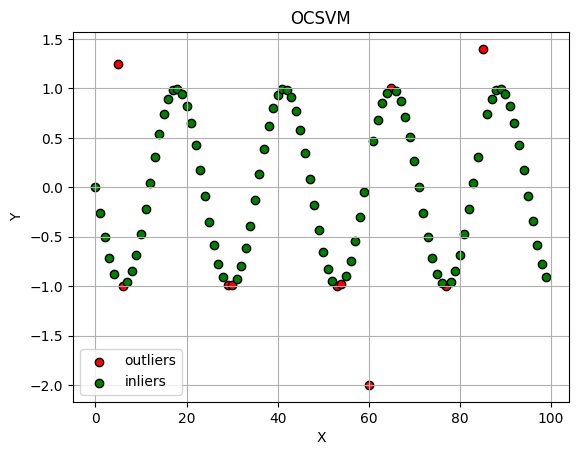

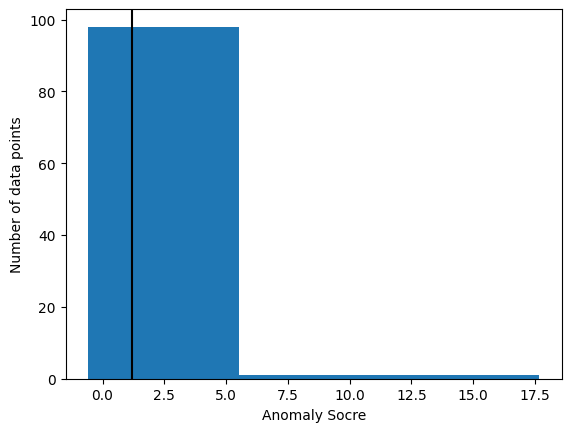

In [29]:
models = OCSVM()
anomaly_score = outliers_detection(models,'OCSVM')

In [30]:
raw_outliers = np.where(anomaly_score >= 2.5)
raw_outliers

(array([ 5, 60, 85], dtype=int64),)

**Contamination parameter is the amount of contamination of the dataset i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.**

[ 5 60 85]


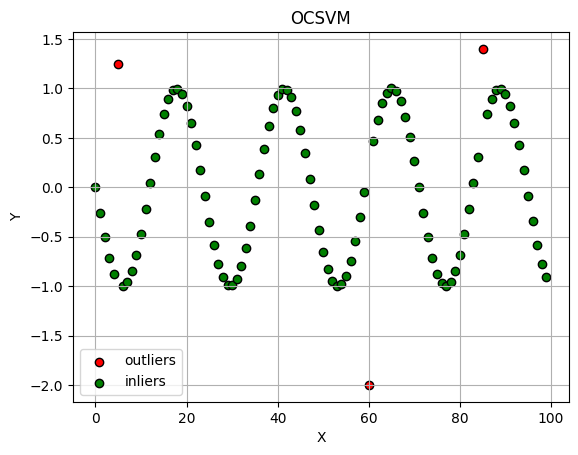

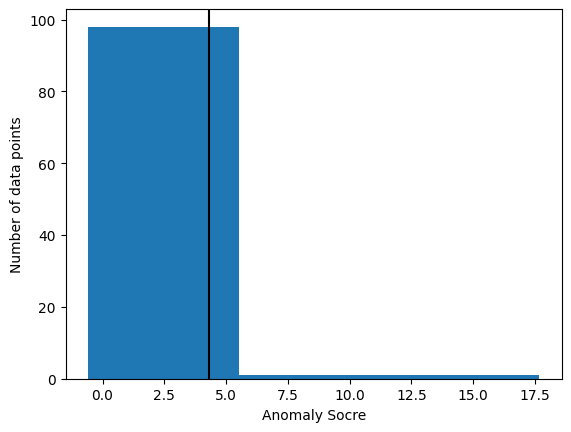

In [31]:
model = OCSVM(contamination=n_outliers/len(Y))
anomaly_score = outliers_detection(model,'OCSVM')

# Probabilistic models

* **ABOD(Angle-Based Outlier Detection)** - This technique is based on the idea of keeping an eye on the angle formed by a set of any three data points in the multi-variate feature space. The variance in the magnitude of the angular enclosure comes out to be different for outliers and the normal points.


* **FastABOD(Fast Angle-Based Outlier Detection)** 


* **COPOD(Copula-Based Outlier Detection)** - A copula describes the dependence structure between random variables. The COPOD algorithm does several nathematical estimations and transformations to compute an outlier score.COPOD first constructs an empirical copula, and then uses it to predict tail probabilities of each given data point to determine its level of extremeness.


* **MAD(Median Absolute Deviation)** - It is a statistic that gives the average distance of the data points from the median. It is a robust measure of the variability of a univariate sample of quantitative data or it is a robust measure of how spread out a set of data is.


* **SOS(Stochastic Outlier Selection)** - The SOS algorithm computes for each data point an outlier probability. It is an unsupervised outlier-selection algorithm that takes as input either a feature matrix or a dissimalrity matrix and outputs for each data point an outlier probability. Intuitively, a data point is considered to be an outlier when the other data points have insufficiently affinity with it.


[ 6 29 30 53 54 60 76 77 78]


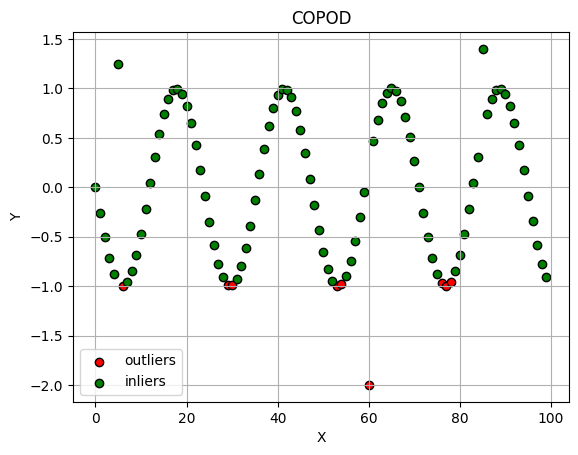

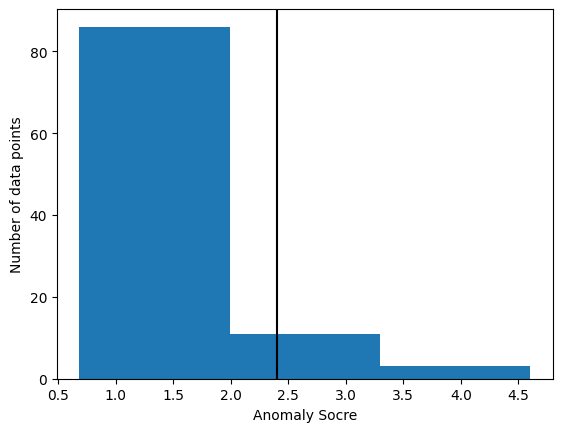

In [32]:
model = COPOD()
anomaly_score = outliers_detection(model,'COPOD')